# **Original Model**

In [ ]:

from transformers import T5Tokenizer, T5ForConditionalGeneration

tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-small")
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-small")

input_text = "translate English to German: How old are you?"
input_ids = tokenizer(input_text, return_tensors="pt").input_ids

outputs = model.generate(input_ids)
print(tokenizer.decode(outputs[0]))


<pad> Wie ich er bitten?</s>


In [ ]:

from transformers import T5Tokenizer, T5ForConditionalGeneration

tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-small")
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-small")

input_text = "What is the primary purpose of the Second Amendment ?"
input_ids = tokenizer(input_text, return_tensors="pt").input_ids

outputs = model.generate(input_ids)
print(tokenizer.decode(outputs[0]))


<pad> To protect the rights of the public</s>


In [ ]:

from transformers import T5Tokenizer, T5ForConditionalGeneration

tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-small")
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-small")

input_text = "What restrictions does the Third Amendment place on the quartering of soldiers ?"
input_ids = tokenizer(input_text, return_tensors="pt").input_ids

outputs = model.generate(input_ids)
print(tokenizer.decode(outputs[0]))


<pad> The Third Amendment is a prohibition on the quartering of soldiers.</s>


# **Fine Tuning**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install transformers[torch] tokenizers datasets evaluate rouge_score sentencepiece huggingface_hub --upgrade

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.5/417.5 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.5 MB/s eta 0:00:00
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=d0256b46692f569bb61b499bab12e34904064c7ef3700bbabc378d35f0d28f43
  S

In [ ]:
import nltk
from datasets import load_dataset
import evaluate
import numpy as np
from transformers import T5Tokenizer, DataCollatorForSeq2Seq
from transformers import T5ForConditionalGeneration, Seq2SeqTrainingArguments, Seq2SeqTrainer

In [ ]:
pip install datasets

In [ ]:
from datasets import Dataset, DatasetDict
# Load and split the dataset
from datasets import load_dataset
import json

# Opening JSON file
f = open('/content/law.json')

# returns JSON object as
# a dictionary
data = json.load(f)

formatted_data = {
    "question": [item["question"] for item in data],
    "answer": [item["answer"] for item in data]
}
#print(formatted_data)

dataset = Dataset.from_dict(formatted_data)
    #print(dataset)
dataset = DatasetDict({'train': dataset})
print(dataset)



DatasetDict({
    train: Dataset({
        features: ['question', 'answer'],
        num_rows: 238
    })
})


In [ ]:
# Load and split the dataset
dataset = dataset["train"].train_test_split(test_size=0.2)

In [ ]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['question', 'answer'],
        num_rows: 190
    })
    test: Dataset({
        features: ['question', 'answer'],
        num_rows: 48
    })
})


In [ ]:
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-small")
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-small")
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
# We prefix our tasks with "answer the question"
prefix = "answer the question: "

# Define our preprocessing function
def preprocess_function(examples):
    """Add prefix to the sentences, tokenize the text, and set the labels"""
    # The "inputs" are the tokenized answer:
    inputs = [prefix + doc for doc in examples["question"]]
    model_inputs = tokenizer(inputs, max_length=128, truncation=True)

    # The "labels" are the tokenized outputs:
    labels = tokenizer(text_target=examples["answer"], max_length=512, truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# Map the preprocessing function across our dataset
tokenized_dataset = dataset.map(preprocess_function, batched=True)



Map:   0%|          | 0/190 [00:00<?, ? examples/s]

Map:   0%|          | 0/48 [00:00<?, ? examples/s]

In [ ]:
nltk.download("punkt", quiet=True)
metric = evaluate.load("rouge")

def compute_metrics(eval_preds):
    preds, labels = eval_preds

    # decode preds and labels
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # rougeLSum expects newline after each sentence
    decoded_preds = ["\n".join(nltk.sent_tokenize(pred.strip())) for pred in decoded_preds]
    decoded_labels = ["\n".join(nltk.sent_tokenize(label.strip())) for label in decoded_labels]

    result = metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)
    return result

In [ ]:
# Set up training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=3e-4,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=4,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=8,
    predict_with_generate=True,
    push_to_hub=False
)

# Set up trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)


" WE ALL ONE "
" WEll all say other "
# Train the model
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum
1,No log,1.824172,0.443442,0.291037,0.393730,0.395759
2,No log,1.622668,0.485607,0.375258,0.448194,0.451367
3,No log,1.518112,0.526841,0.410069,0.492874,0.494351
4,No log,1.454191,0.542629,0.435067,0.512432,0.518205
5,No log,1.413995,0.543121,0.426910,0.514399,0.519639
6,No log,1.395923,0.543876,0.429963,0.516060,0.521666
7,No log,1.391716,0.530258,0.408666,0.496695,0.500601
8,No log,1.388949,0.534778,0.414248,0.502427,0.505907


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


TrainOutput(global_step=192, training_loss=1.4834227561950684, metrics={'train_runtime': 72.6195, 'train_samples_per_second': 20.931, 'train_steps_per_second': 2.644, 'total_flos': 13477061591040.0, 'train_loss': 1.4834227561950684, 'epoch': 8.0})

In [ ]:
pip install matplotlib


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum
1,1.189300,1.379745,0.553284,0.438356,0.522720,0.526243
2,0.824300,1.425745,0.554140,0.443742,0.527419,0.532505
3,0.772500,1.455859,0.538228,0.439721,0.512793,0.517978
4,0.590700,1.446796,0.526214,0.417594,0.498299,0.502505
5,0.739700,1.477108,0.541026,0.426576,0.513216,0.518427
6,0.685700,1.451164,0.543145,0.428475,0.512852,0.517944
7,0.660600,1.451386,0.535194,0.428026,0.506967,0.511100
8,0.725200,1.443375,0.540204,0.432457,0.510536,0.513801


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


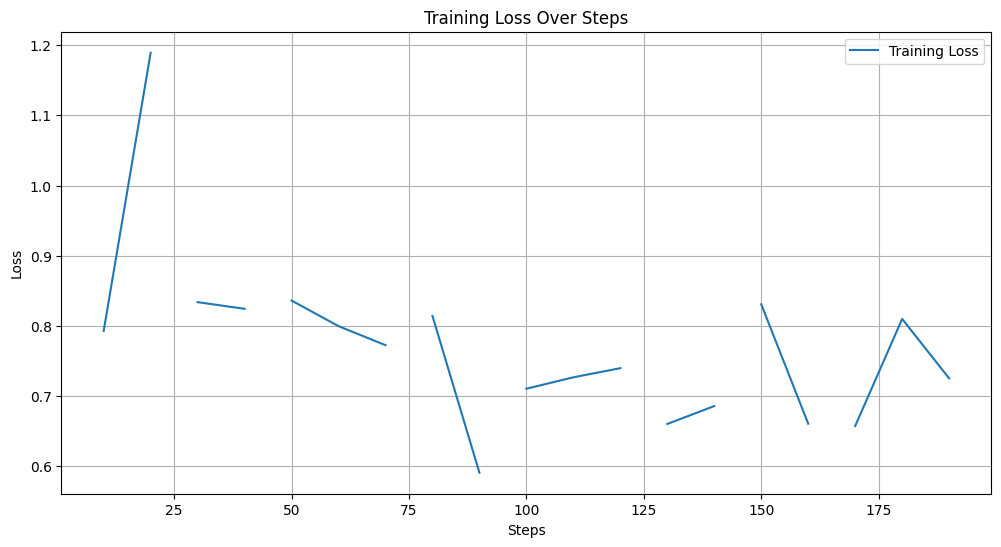

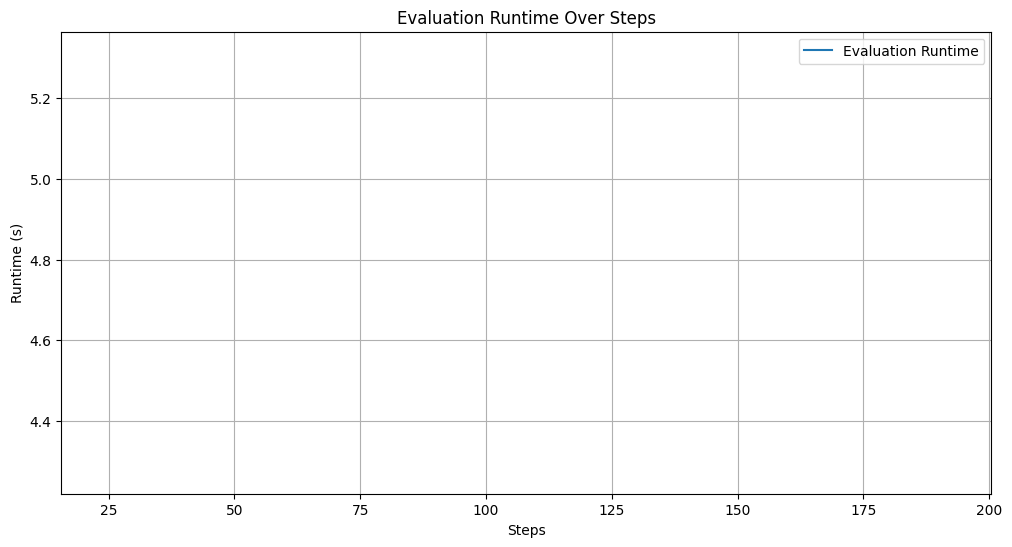

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments

# Define your training arguments and trainer as before
training_args = Seq2SeqTrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=3e-4,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=4,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=8,
    predict_with_generate=True,
    push_to_hub=False,
    logging_dir='./logs', # Directory for logs
    logging_steps=10, # Log every 10 steps
)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()



In [ ]:
trainer.evaluate()

{'eval_loss': 1.388948917388916,
 'eval_rouge1': 0.5347776251501198,
 'eval_rouge2': 0.4142480080702292,
 'eval_rougeL': 0.5024272320882355,
 'eval_rougeLsum': 0.5059065517064176,
 'eval_runtime': 5.019,
 'eval_samples_per_second': 9.564,
 'eval_steps_per_second': 2.391,
 'epoch': 8.0}

In [ ]:
model.save_pretrained("./model")


In [ ]:
tokenizer.save_pretrained("./tokens")


('./tokens/tokenizer_config.json',
 './tokens/special_tokens_map.json',
 './tokens/spiece.model',
 './tokens/added_tokens.json')

In [ ]:
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load the trained model and tokenizer
model_path = "./results"  # Replace with the path to your trained model
tokenizer_path = "/content/tokens"  # Replace with the path to your trained tokenizer
model = T5ForConditionalGeneration.from_pretrained(model_path)
tokenizer = T5Tokenizer.from_pretrained(tokenizer_path)

# Input question for testing
input_question = " What is the primary purpose of the Second Amendment ?"

# Prefix for your task
prefix = "answer the question: "

# Tokenize and preprocess the input
input_text = prefix + input_question
input_ids = tokenizer.encode(input_text, return_tensors="pt", max_length=128, truncation=True)

# Generate a response from the model
with torch.no_grad():
    # Ensure you are using input_ids as the input, not 'inputs'
    output_ids = model.generate(input_ids, max_length=512, num_return_sequences=1, no_repeat_ngram_size=2, top_k=50)

# Decode the generated response
generated_response = tokenizer.decode(output_ids[0], skip_special_tokens=True)

# Print the generated response
print("Generated Response:", generated_response)


Generated Response: The Second Amendment requires that the people of the United States and the State of New York, in the Union, be able to obtain the right to vote in elections within the state legislatures.


In [ ]:
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load the trained model and tokenizer
model_path = "./results"  # Replace with the path to your trained model
tokenizer_path = "/content/tokens"  # Replace with the path to your trained tokenizer
model = T5ForConditionalGeneration.from_pretrained(model_path)
tokenizer = T5Tokenizer.from_pretrained(tokenizer_path)

# Input question for testing
input_question = " translate English to German: How old are you?"

# Prefix for your task
prefix = "answer the question: "

# Tokenize and preprocess the input
input_text = prefix + input_question
input_ids = tokenizer.encode(input_text, return_tensors="pt", max_length=128, truncation=True)

# Generate a response from the model
with torch.no_grad():
    # Ensure you are using input_ids as the input, not 'inputs'
    output_ids = model.generate(input_ids, max_length=512, num_return_sequences=1, no_repeat_ngram_size=2, top_k=50)

# Decode the generated response
generated_response = tokenizer.decode(output_ids[0], skip_special_tokens=True)

# Print the generated response
print("Generated Response:", generated_response)


Generated Response: How old are you?


In [ ]:
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load the trained model and tokenizer
model_path = "./results"  # Replace with the path to your trained model
tokenizer_path = "/content/tokens"  # Replace with the path to your trained tokenizer
model = T5ForConditionalGeneration.from_pretrained(model_path)
tokenizer = T5Tokenizer.from_pretrained(tokenizer_path)

# Input question for testing
input_question = "What restrictions does the Third Amendment place on the quartering of soldiers ? "

# Prefix for your task
prefix = "answer the question: "

# Tokenize and preprocess the input
input_text = prefix + input_question
input_ids = tokenizer.encode(input_text, return_tensors="pt", max_length=128, truncation=True)

# Generate a response from the model
with torch.no_grad():
    # Ensure you are using input_ids as the input, not 'inputs'
    output_ids = model.generate(input_ids, max_length=512, num_return_sequences=1, no_repeat_ngram_size=2, top_k=50)

# Decode the generated response
generated_response = tokenizer.decode(output_ids[0], skip_special_tokens=True)

# Print the generated response
print("Generated Response:", generated_response)


Generated Response: The Third Amendment restricts the quartering of soldiers by the armed forces, requiring that the soldiers be able to assemble and occupy the territory of the United States.
